In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import HashingVectorizer
import sys
sys.path.append("/Users/fennyzalavadia/Desktop/Verusen_2/tombstone")

from base.services.data_preprocessing.nlp_pre_processing import NLPPreProcessing
nlp = NLPPreProcessing()


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [154]:
import pandas as pd
mat_desc = pd.read_parquet('Dataset/org10_material_embeddings.parquet', engine='pyarrow')

In [5]:
mat_desc.head()

material_group manufacturer_name manufacturer_part_number  \
0   BEARING,GNRL            TIMKEN                    19268   
1      SEAL,GNRL  SQUARE D COMPANY                   ZBE101   
2   SWITCH,LIMIT     ALLEN BRADLEY            42GRP 9070 QD   
3      ELEC,GNRL     ALLEN BRADLEY               800T PA16A   
4      ELEC,GNRL     ALLEN BRADLEY               800T N159R   

                                material_description  \
0                       BEARING,GNRL,19268,19268 CUP   
1  SEAL,GNRL,ZBE101,W/KEVLAR GLUE UNIT TO, PRES R...   
2  SWITCH,LIMIT,42GRP-9070-QD,LONG RANGE DIFFUSE,...   
3          ELEC,GNRL,800T-PA16A,PUSH BUTTON OPERATOR   
4                     ELEC,GNRL,800T-N159R,CAP (RED)   

                                       ft_embeddings  \
0  [-2.2590609, -2.6805592, 3.6591973, -7.125765,...   
1  [1.5565315, -6.4679775, 7.8891106, -3.8002853,...   
2  [12.576007, 0.37772095, 11.292997, -7.6594696,...   
3  [-3.1718006, -3.8807662, 12.677101, -3.5664601...   
4  [-0.3755529, -7.019397, 10.198698, -5.477688, ...   

                                 attended_embeddings  
0  [0.0, 0.0, 0.0, 4.6948338, 3.6575716, 0.0, 0.0...  
1  [0.0, 0.0, 0.0, 4.5022707, 3.3499973, 0.0, 0.0...  
2  [9.581449, 8.550006, 6.574473, 0.0, 0.0, 6.003...  
3  [0.0, 0.0, 0.0, 5.877699, 4.4785647, 0.0, 0.0,...  
4  [0.0, 0.0, 0.0, 6.083133, 4.451218, 0.0, 0.0, ...

In [130]:
mat_desc['attended_embeddings'][0].shape

(16,)

In [155]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)

In [156]:
mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)


In [8]:
mat_desc

material_group manufacturer_name manufacturer_part_number  \
0           BEARING,GNRL            TIMKEN                    19268   
1              SEAL,GNRL  SQUARE D COMPANY                   ZBE101   
2           SWITCH,LIMIT     ALLEN BRADLEY            42GRP 9070 QD   
3              ELEC,GNRL     ALLEN BRADLEY               800T PA16A   
4              ELEC,GNRL     ALLEN BRADLEY               800T N159R   
...                  ...               ...                      ...   
995430     CYLINDER,PNEU             ROYAL    L10C36C3A1C1AAWF L398   
995431       GASKET,GNRL         ARMSTRONG                 A22106 1   
995432      CYLINDER,KIT             ROYAL                 KL10025A   
995433        FILTER,OIL             HYPRO             HP107L36 3MB   
995434  MOTOR,ELECTRICAL   LOUIS ALLIS CO.           LAM40 18 324TC   

                                     material_description  \
0                            BEARING,GNRL,19268,19268 CUP   
1       SEAL,GNRL,ZBE101,W/KEVLAR GLUE UNIT TO, PRES R...   
2       SWITCH,LIMIT,42GRP-9070-QD,LONG RANGE DIFFUSE,...   
3               ELEC,GNRL,800T-PA16A,PUSH BUTTON OPERATOR   
4                          ELEC,GNRL,800T-N159R,CAP (RED)   
...                                                   ...   
995430  CYLINDER,PNEU,L10C36C3A1C1AAWF-L398,10" AIR CY...   
995431       GASKET,GNRL,A22106-1,CVR, FOR 214 STEAM TRAP   
995432  CYLINDER,KIT,KL10025A,SEAL FOR  L10C36C3A1C1AA...   
995433           FILTER,OIL,HP107L36-3MB,SYNTH, HYDR, OIL   
995434  MOTOR,ELECTRICAL,LAM40-18-324TC,40HP 1800RPM 2...   

                                            ft_embeddings  \
0       [-2.2590609, -2.6805592, 3.6591973, -7.125765,...   
1       [1.5565315, -6.4679775, 7.8891106, -3.8002853,...   
2       [12.576007, 0.37772095, 11.292997, -7.6594696,...   
3       [-3.1718006, -3.8807662, 12.677101, -3.5664601...   
4       [-0.3755529, -7.019397, 10.198698, -5.477688, ...   
...                                                   ...   
995430  [-0.34244072, -5.361178, 3.6343267, -3.0323596...   
995431  [1.4060541, -11.454607, -0.12366381, -5.487655...   
995432  [0.5517195, -3.211942, 4.0595846, -3.4330122, ...   
995433  [0.42698902, 0.73841274, 1.4445797, 4.1507845,...   
995434  [6.430227, -15.3085575, 1.9582995, -8.205602, ...   

                                      attended_embeddings             Category  
0       [0.0, 0.0, 0.0, 4.6948338, 3.6575716, 0.0, 0.0...                  BPT  
1       [0.0, 0.0, 0.0, 4.5022707, 3.3499973, 0.0, 0.0...                  BPT  
2       [9.581449, 8.550006, 6.574473, 0.0, 0.0, 6.003...  Electrical Supplies  
3       [0.0, 0.0, 0.0, 5.877699, 4.4785647, 0.0, 0.0,...  Electrical Supplies  
4       [0.0, 0.0, 0.0, 6.083133, 4.451218, 0.0, 0.0, ...  Electrical Supplies  
...                                                   ...                  ...  
995430  [17.238056, 22.06888, 16.353865, 0.0, 0.0, 15....            HYD & PNE  
995431  [0.0, 0.0, 0.0, 12.524296, 8.563015, 0.0, 0.0,...                  PVF  
995432  [4.4211464, 5.135321, 3.8918185, 0.0, 0.0, 3.2...            HYD & PNE  
995433  [0.0, 0.0, 0.0, 4.8953314, 3.603377, 0.0, 0.0,...                  NaN  
995434  [23.54777, 27.449272, 21.335924, 0.0, 0.0, 19....               Motors  

[995435 rows x 7 columns]

In [9]:
mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [10]:
mat_desc

material_group manufacturer_name manufacturer_part_number  \
0           BEARING,GNRL            TIMKEN                    19268   
1              SEAL,GNRL  SQUARE D COMPANY                   ZBE101   
2           SWITCH,LIMIT     ALLEN BRADLEY            42GRP 9070 QD   
3              ELEC,GNRL     ALLEN BRADLEY               800T PA16A   
4              ELEC,GNRL     ALLEN BRADLEY               800T N159R   
...                  ...               ...                      ...   
610013         TAPE,GNRL          WESTWARD                   13A758   
610014     CYLINDER,PNEU             ROYAL    L10C36C3A1C1AAWF L398   
610015       GASKET,GNRL         ARMSTRONG                 A22106 1   
610016      CYLINDER,KIT             ROYAL                 KL10025A   
610017  MOTOR,ELECTRICAL   LOUIS ALLIS CO.           LAM40 18 324TC   

                                     material_description  \
0                            BEARING,GNRL,19268,19268 CUP   
1       SEAL,GNRL,ZBE101,W/KEVLAR GLUE UNIT TO, PRES R...   
2       SWITCH,LIMIT,42GRP-9070-QD,LONG RANGE DIFFUSE,...   
3               ELEC,GNRL,800T-PA16A,PUSH BUTTON OPERATOR   
4                          ELEC,GNRL,800T-N159R,CAP (RED)   
...                                                   ...   
610013  TAPE,GNRL,13A758,DRYWALL MESH TAPE 2 IN X 300 ...   
610014  CYLINDER,PNEU,L10C36C3A1C1AAWF-L398,10" AIR CY...   
610015       GASKET,GNRL,A22106-1,CVR, FOR 214 STEAM TRAP   
610016  CYLINDER,KIT,KL10025A,SEAL FOR  L10C36C3A1C1AA...   
610017  MOTOR,ELECTRICAL,LAM40-18-324TC,40HP 1800RPM 2...   

                                            ft_embeddings  \
0       [-2.2590609, -2.6805592, 3.6591973, -7.125765,...   
1       [1.5565315, -6.4679775, 7.8891106, -3.8002853,...   
2       [12.576007, 0.37772095, 11.292997, -7.6594696,...   
3       [-3.1718006, -3.8807662, 12.677101, -3.5664601...   
4       [-0.3755529, -7.019397, 10.198698, -5.477688, ...   
...                                                   ...   
610013  [-0.320339, -10.236637, 3.9370492, -2.3017502,...   
610014  [-0.34244072, -5.361178, 3.6343267, -3.0323596...   
610015  [1.4060541, -11.454607, -0.12366381, -5.487655...   
610016  [0.5517195, -3.211942, 4.0595846, -3.4330122, ...   
610017  [6.430227, -15.3085575, 1.9582995, -8.205602, ...   

                                      attended_embeddings             Category  
0       [0.0, 0.0, 0.0, 4.6948338, 3.6575716, 0.0, 0.0...                  BPT  
1       [0.0, 0.0, 0.0, 4.5022707, 3.3499973, 0.0, 0.0...                  BPT  
2       [9.581449, 8.550006, 6.574473, 0.0, 0.0, 6.003...  Electrical Supplies  
3       [0.0, 0.0, 0.0, 5.877699, 4.4785647, 0.0, 0.0,...  Electrical Supplies  
4       [0.0, 0.0, 0.0, 6.083133, 4.451218, 0.0, 0.0, ...  Electrical Supplies  
...                                                   ...                  ...  
610013  [0.0, 0.0, 0.0, 6.2108173, 4.331294, 0.0, 0.0,...                  GMS  
610014  [17.238056, 22.06888, 16.353865, 0.0, 0.0, 15....            HYD & PNE  
610015  [0.0, 0.0, 0.0, 12.524296, 8.563015, 0.0, 0.0,...                  PVF  
610016  [4.4211464, 5.135321, 3.8918185, 0.0, 0.0, 3.2...            HYD & PNE  
610017  [23.54777, 27.449272, 21.335924, 0.0, 0.0, 19....               Motors  

[610018 rows x 7 columns]

In [11]:
import re
from nltk.corpus import stopwords

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#|-]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/|-]',r' ',cleaned)
    cleaned = ''.join((x for x in cleaned if not x.isdigit()))
    return cleaned

def change_lower(text):
    
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

In [12]:
mat_desc['Category'] = [change_lower(str(x)) for x in mat_desc['Category']]
mat_desc['material_group'] = [change_lower(str(x)) for x in mat_desc['material_group']]
mat_desc['material_description'] = [change_lower(str(x)) for x in mat_desc['material_description']]


In [13]:
mat_desc

material_group manufacturer_name manufacturer_part_number  \
0           bearing,gnrl            TIMKEN                    19268   
1              seal,gnrl  SQUARE D COMPANY                   ZBE101   
2           switch,limit     ALLEN BRADLEY            42GRP 9070 QD   
3              elec,gnrl     ALLEN BRADLEY               800T PA16A   
4              elec,gnrl     ALLEN BRADLEY               800T N159R   
...                  ...               ...                      ...   
610013         tape,gnrl          WESTWARD                   13A758   
610014     cylinder,pneu             ROYAL    L10C36C3A1C1AAWF L398   
610015       gasket,gnrl         ARMSTRONG                 A22106 1   
610016      cylinder,kit             ROYAL                 KL10025A   
610017  motor,electrical   LOUIS ALLIS CO.           LAM40 18 324TC   

                                     material_description  \
0                            bearing,gnrl,19268,19268 cup   
1       seal,gnrl,zbe101,w/kevlar glue unit to, pres r...   
2       switch,limit,42grp-9070-qd,long range diffuse,...   
3               elec,gnrl,800t-pa16a,push button operator   
4                          elec,gnrl,800t-n159r,cap (red)   
...                                                   ...   
610013  tape,gnrl,13a758,drywall mesh tape 2 in x 300 ...   
610014  cylinder,pneu,l10c36c3a1c1aawf-l398,10" air cy...   
610015       gasket,gnrl,a22106-1,cvr, for 214 steam trap   
610016  cylinder,kit,kl10025a,seal for  l10c36c3a1c1aa...   
610017  motor,electrical,lam40-18-324tc,40hp 1800rpm 2...   

                                            ft_embeddings  \
0       [-2.2590609, -2.6805592, 3.6591973, -7.125765,...   
1       [1.5565315, -6.4679775, 7.8891106, -3.8002853,...   
2       [12.576007, 0.37772095, 11.292997, -7.6594696,...   
3       [-3.1718006, -3.8807662, 12.677101, -3.5664601...   
4       [-0.3755529, -7.019397, 10.198698, -5.477688, ...   
...                                                   ...   
610013  [-0.320339, -10.236637, 3.9370492, -2.3017502,...   
610014  [-0.34244072, -5.361178, 3.6343267, -3.0323596...   
610015  [1.4060541, -11.454607, -0.12366381, -5.487655...   
610016  [0.5517195, -3.211942, 4.0595846, -3.4330122, ...   
610017  [6.430227, -15.3085575, 1.9582995, -8.205602, ...   

                                      attended_embeddings             Category  
0       [0.0, 0.0, 0.0, 4.6948338, 3.6575716, 0.0, 0.0...                  bpt  
1       [0.0, 0.0, 0.0, 4.5022707, 3.3499973, 0.0, 0.0...                  bpt  
2       [9.581449, 8.550006, 6.574473, 0.0, 0.0, 6.003...  electrical supplies  
3       [0.0, 0.0, 0.0, 5.877699, 4.4785647, 0.0, 0.0,...  electrical supplies  
4       [0.0, 0.0, 0.0, 6.083133, 4.451218, 0.0, 0.0, ...  electrical supplies  
...                                                   ...                  ...  
610013  [0.0, 0.0, 0.0, 6.2108173, 4.331294, 0.0, 0.0,...                  gms  
610014  [17.238056, 22.06888, 16.353865, 0.0, 0.0, 15....            hyd & pne  
610015  [0.0, 0.0, 0.0, 12.524296, 8.563015, 0.0, 0.0,...                  pvf  
610016  [4.4211464, 5.135321, 3.8918185, 0.0, 0.0, 3.2...            hyd & pne  
610017  [23.54777, 27.449272, 21.335924, 0.0, 0.0, 19....               motors  

[610018 rows x 7 columns]

In [14]:
mat_desc['Category'].value_counts()

bpt                    209010
electrical supplies    152169
valves                  49566
pvf                     46321
pumps                   29006
hyd & pne               23979
motors                  23378
fasteners               15303
oem                     14372
gms                     11899
logistics                7492
tools                    6265
instrumentation          5916
machine rolls            2976
packaging                2730
lubrication              2523
ppe                      1965
office supplies          1244
safety                   1114
service                   803
abrasives                 721
machine clothing          418
paints                    367
industrial gases          188
direct materials          128
chemicals                  89
construction               49
open                       18
fuels                       9
Name: Category, dtype: int64

In [15]:
mat_desc['Category'].loc[~mat_desc['Category'].isin(['bpt','valves','pvf','pumps','electrical supplies','hyd & pne','motors'])] = 'other'

In [16]:
mat_desc['Category'].value_counts()

bpt                    209010
electrical supplies    152169
other                   76589
valves                  49566
pvf                     46321
pumps                   29006
hyd & pne               23979
motors                  23378
Name: Category, dtype: int64

In [84]:
train_data = mat_desc.groupby('Category', group_keys=False).apply(lambda x: x.sample(frac=0.05,random_state=0))

In [85]:
test_data = mat_desc.groupby('Category', group_keys=False).apply(lambda x: x.sample(frac=0.95,random_state=0))

In [86]:
train_data['Category'].value_counts()

bpt                    10450
electrical supplies     7608
other                   3829
valves                  2478
pvf                     2316
pumps                   1450
hyd & pne               1199
motors                  1169
Name: Category, dtype: int64

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = train_data['material_description']


tf_idf_vectorizor_1 = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 10000)
tf_idf_1 = tf_idf_vectorizor_1.fit_transform(data)
tf_idf_norm_1 = normalize(tf_idf_1)
tf_idf_array_1 = tf_idf_norm_1.toarray()

In [89]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array_1)

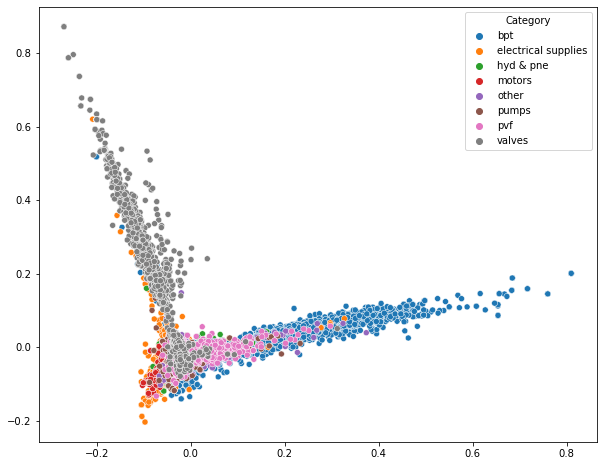

In [90]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = train_data,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Category")

plt.show()

In [91]:
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array_1)

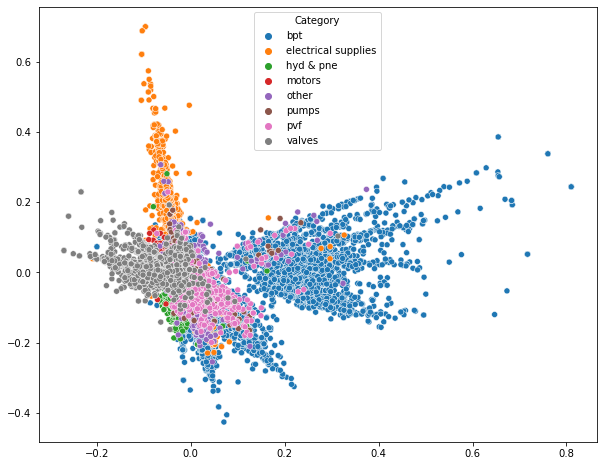

In [92]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = train_data,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 2],hue = "Category")

plt.show()

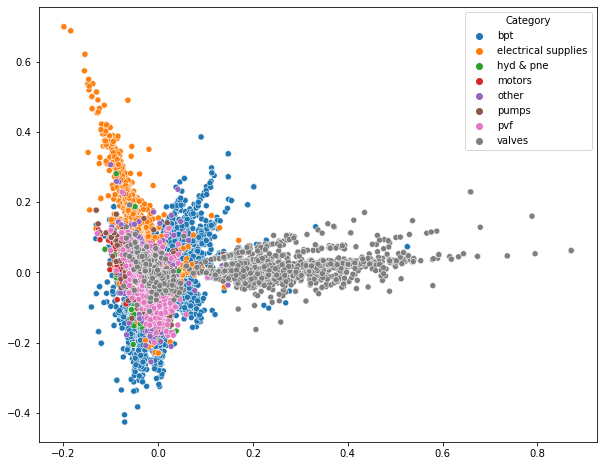

In [93]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = train_data,x =Y_sklearn[:, 1] , y=Y_sklearn[:, 2],hue = "Category")

plt.show()

In [94]:
train_data['Label'] = train_data['Category'].map(le_name_mapping, na_action='ignore')

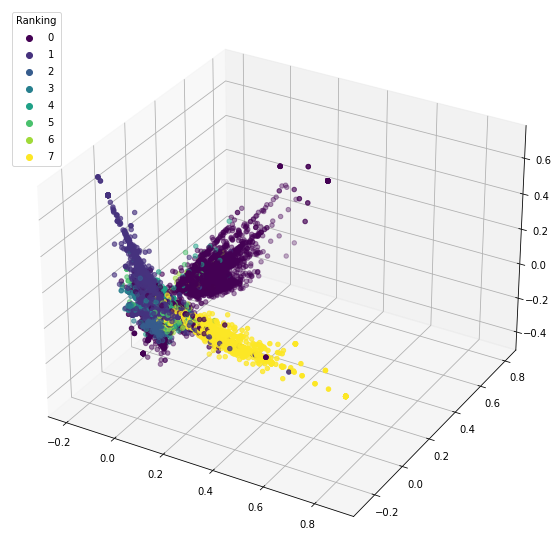

In [95]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(Y_sklearn[:,1], Y_sklearn[:,0], Y_sklearn[:,2], c=train_data.Label,s=20, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(num=train_data.Label.unique()),
                    loc="upper left", title="Ranking")
plt.show()

[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT VARIABLE')]

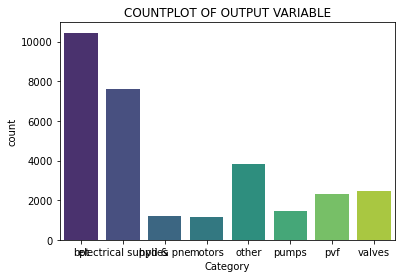

In [96]:
plt.figure(figsize = (6,4))
sns.countplot (x = "Category",data = train_data, palette= 'viridis').set(title = 'COUNTPLOT OF OUTPUT VARIABLE')

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

from sklearn.metrics import cohen_kappa_score

In [98]:
# Import label encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'bpt': 0, 'electrical supplies': 1, 'hyd & pne': 2, 'motors': 3, 'other': 4, 'pumps': 5, 'pvf': 6, 'valves': 7}


In [99]:
train_data['Label'] = train_data['Category'].map(le_name_mapping, na_action='ignore')

In [220]:
y = pd.DataFrame(train_data['Label'])

In [221]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(tf_idf_array_1,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [222]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (24399, 10000)
X_test shape: (6100, 10000)
y_train shape: (24399, 1)
y_test shape: (6100, 1)


In [223]:
X_train.shape

(24399, 10000)

In [103]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [104]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 



Train Score: 0.908848469015755
Test Score: 0.9280327868852459
Cohen Kappa Score: 0.9081407928356199
[[1985   14    9    7   26   12   28    7]
 [  20 1491    4    4   23    4   10   11]
 [   9    2  205    0    6    0   11    4]
 [   3    2    0  206    0    1    0    0]
 [  42   13    1    1  678    5    6    5]
 [  30    8    0    1   15  272    7    1]
 [  30    8    6    0    8    6  396    2]
 [  10    8    2    1    5    0    1  428]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2088
           1       0.96      0.95      0.96      1567
           2       0.90      0.86      0.88       237
           3       0.94      0.97      0.95       212
           4       0.89      0.90      0.90       751
           5       0.91      0.81      0.86       334
           6       0.86      0.87      0.87       456
           7       0.93      0.94      0.94       455

    accuracy                           0.93      6100
   macro avg 

# Testing on Unseen Data

In [107]:
unseen_data = test_data.sample(frac = 0.1,random_state = 0)

In [126]:
unseen_data.shape

(57952, 8)

In [110]:
data = unseen_data['material_description']
tf_idf_2 = tf_idf_vectorizor_1.transform(data)
tf_idf_norm_2 = normalize(tf_idf_2)
X_test = tf_idf_norm_2.toarray()

In [115]:
X_test = sc.transform(X_test)

In [116]:
y_pred = reg.predict(X_test)

In [117]:
from collections import Counter
Counter(y_pred)

Counter({1: 14558,
         7: 4701,
         6: 4393,
         0: 19966,
         3: 2252,
         4: 7364,
         2: 2234,
         5: 2484})

In [118]:
le_name_mapping

{'bpt': 0,
 'electrical supplies': 1,
 'hyd & pne': 2,
 'motors': 3,
 'other': 4,
 'pumps': 5,
 'pvf': 6,
 'valves': 7}

In [120]:
unseen_data['Label'] = y_pred

In [122]:
dict2 = {0:'bpt',1:'electrical supplies',2:'hyd & pne',3:'motors',4:'other',5:'pumps',6:'pvf',7:'valves'}

In [123]:
unseen_data['Label'] = [dict2[i] for i in unseen_data['Label']]

In [125]:
unseen_data[unseen_data['Category']!=unseen_data['Label']]

material_group         manufacturer_name  manufacturer_part_number  \
122603    mechanical,gnrl      MARLEY COOLING TOWER                    209155   
373800           bolt,eye       SEGUIN MACHINE SHOP                  EST 3567   
289121          gear,rack  GENERAL ELECTRIC COMPANY             09456952P0001   
52732          motor,gear             SEW EURODRIVE             KA37/TDRS71S4   
219665   motor,electrical              TOSHIBAMERIC                  5635V07F   
...                   ...                       ...                       ...   
242600         valve,gnrl       UNITED TECHNOLOGIES  FLUID POWER  3 C5 03 115   
248440        switch,gnrl                FLAMEX INC                  F91 4438   
13390         washer,gnrl                CRITTENDEN                  44P073 A   
536726         motor,gnrl                       ABB    DCS800 S02 0820 05 171   
587558  specialty,general                   KEYENCE                 GL R88H L   

                                     material_description  \
122603  mechanical,gnrl209155oil slinger,for marley co...   
373800  bolt,eye,est 3567,(new)tipple chain lift pivot...   
289121  gear, rack, 09456952p0001, gear, rack, turbine...   
52732   motor,gearka37/tdrs71s41/2hp, 58.60:1 ratio 1i...   
219665           motor,electrical,5635v07f,1800rpm,145 jm   
...                                                   ...   
242600  valve,gnrl,fluid power  3-c5-03-115,valve, dir...   
248440   switch,gnrl,f91-4438,g1 valve set w/flow monitor   
13390           washer,gnrl,44p073-a,1/4in id, 1-1/4in od   
536726     motor,gnrl,dcs800-s02-0820-05+171,400 hp drive   
587558   specialty,general,gl-r88h_l,safety light curtain   

                                            ft_embeddings  \
122603  [4.149665, -6.517256, -1.299209, -7.6974916, 6...   
373800  [9.970446, -16.036058, 2.666249, -5.431535, 4....   
289121  [8.577759, -3.1565523, 2.5825768, -9.017857, 5...   
52732   [6.3327785, -2.7632792, -3.1689703, -4.477364,...   
219665  [2.5767455, -2.4708333, 2.094743, -4.527727, 6...   
...                                                   ...   
242600  [1.1732033, -4.8180165, 0.5938909, -2.1875265,...   
248440  [0.3507065, -3.8763654, 4.5435033, -3.6363285,...   
13390   [0.09041373, -5.4857373, 3.7199757, -3.367319,...   
536726  [7.5042715, -2.4906955, 2.0287163, -2.078941, ...   
587558  [-1.8339996, -4.773477, 5.8711133, -4.0314264,...   

                                      attended_embeddings  \
122603  [0.0, 0.0, 0.0, 19.268585, 13.052062, 0.0, 0.0...   
373800  [6.921973, 10.839969, 8.55098, 0.0, 0.0, 5.765...   
289121  [0.0, 0.0, 0.0, 4.595503, 3.3495183, 0.0, 0.0,...   
52732   [2.7346134, 0.0, 0.0, 2.8473554, 2.1190917, 0....   
219665  [0.0, 0.0, 0.0, 4.814021, 3.4775355, 0.0, 0.0,...   
...                                                   ...   
242600  [11.432553, 16.965149, 12.7173395, 0.0, 0.0, 1...   
248440  [0.0, 0.0, 0.0, 1.2725922, 1.3688389, 0.0, 0.0...   
13390   [3.6064105, 2.4242153, 2.4850616, 0.0, 0.0, 2....   
536726  [27.830938, 30.705927, 22.622738, 0.0, 0.0, 22...   
587558  [0.0, 0.0, 0.0, 1.7530923, 0.8861898, 0.0, 0.0...   

                   Category                Label  
122603                  bpt  electrical supplies  
373800                other                  bpt  
289121                  bpt  electrical supplies  
52732                motors                pumps  
219665               motors  electrical supplies  
...                     ...                  ...  
242600               valves  electrical supplies  
248440  electrical supplies               valves  
13390                   pvf                  bpt  
536726               motors                  bpt  
587558                other  electrical supplies  

[4581 rows x 8 columns]

In [127]:
confusion_matrix(unseen_data['Category'], unseen_data['Label'])

array([[18554,   185,    86,    93,   363,   164,   183,    98],
       [  200, 13867,    38,    67,   199,    52,    77,    79],
       [   84,    31,  2006,     1,    36,     9,    66,    14],
       [   78,    41,    10,  2050,    13,    13,     5,     9],
       [  364,   190,    25,    19,  6491,    61,    91,    65],
       [  309,    80,     8,    12,   105,  2128,    50,    28],
       [  267,    97,    42,     5,    96,    34,  3899,    32],
       [  110,    67,    19,     5,    61,    23,    22,  4376]])

## Use Embeddings

In [157]:
mat_desc

material_group manufacturer_name manufacturer_part_number  \
0           BEARING,GNRL            TIMKEN                    19268   
1              SEAL,GNRL  SQUARE D COMPANY                   ZBE101   
2           SWITCH,LIMIT     ALLEN BRADLEY            42GRP 9070 QD   
3              ELEC,GNRL     ALLEN BRADLEY               800T PA16A   
4              ELEC,GNRL     ALLEN BRADLEY               800T N159R   
...                  ...               ...                      ...   
995430     CYLINDER,PNEU             ROYAL    L10C36C3A1C1AAWF L398   
995431       GASKET,GNRL         ARMSTRONG                 A22106 1   
995432      CYLINDER,KIT             ROYAL                 KL10025A   
995433        FILTER,OIL             HYPRO             HP107L36 3MB   
995434  MOTOR,ELECTRICAL   LOUIS ALLIS CO.           LAM40 18 324TC   

                                     material_description  \
0                            BEARING,GNRL,19268,19268 CUP   
1       SEAL,GNRL,ZBE101,W/KEVLAR GLUE UNIT TO, PRES R...   
2       SWITCH,LIMIT,42GRP-9070-QD,LONG RANGE DIFFUSE,...   
3               ELEC,GNRL,800T-PA16A,PUSH BUTTON OPERATOR   
4                          ELEC,GNRL,800T-N159R,CAP (RED)   
...                                                   ...   
995430  CYLINDER,PNEU,L10C36C3A1C1AAWF-L398,10" AIR CY...   
995431       GASKET,GNRL,A22106-1,CVR, FOR 214 STEAM TRAP   
995432  CYLINDER,KIT,KL10025A,SEAL FOR  L10C36C3A1C1AA...   
995433           FILTER,OIL,HP107L36-3MB,SYNTH, HYDR, OIL   
995434  MOTOR,ELECTRICAL,LAM40-18-324TC,40HP 1800RPM 2...   

                                            ft_embeddings  \
0       [-2.2590609, -2.6805592, 3.6591973, -7.125765,...   
1       [1.5565315, -6.4679775, 7.8891106, -3.8002853,...   
2       [12.576007, 0.37772095, 11.292997, -7.6594696,...   
3       [-3.1718006, -3.8807662, 12.677101, -3.5664601...   
4       [-0.3755529, -7.019397, 10.198698, -5.477688, ...   
...                                                   ...   
995430  [-0.34244072, -5.361178, 3.6343267, -3.0323596...   
995431  [1.4060541, -11.454607, -0.12366381, -5.487655...   
995432  [0.5517195, -3.211942, 4.0595846, -3.4330122, ...   
995433  [0.42698902, 0.73841274, 1.4445797, 4.1507845,...   
995434  [6.430227, -15.3085575, 1.9582995, -8.205602, ...   

                                      attended_embeddings             Category  
0       [0.0, 0.0, 0.0, 4.6948338, 3.6575716, 0.0, 0.0...                  BPT  
1       [0.0, 0.0, 0.0, 4.5022707, 3.3499973, 0.0, 0.0...                  BPT  
2       [9.581449, 8.550006, 6.574473, 0.0, 0.0, 6.003...  Electrical Supplies  
3       [0.0, 0.0, 0.0, 5.877699, 4.4785647, 0.0, 0.0,...  Electrical Supplies  
4       [0.0, 0.0, 0.0, 6.083133, 4.451218, 0.0, 0.0, ...  Electrical Supplies  
...                                                   ...                  ...  
995430  [17.238056, 22.06888, 16.353865, 0.0, 0.0, 15....            HYD & PNE  
995431  [0.0, 0.0, 0.0, 12.524296, 8.563015, 0.0, 0.0,...                  PVF  
995432  [4.4211464, 5.135321, 3.8918185, 0.0, 0.0, 3.2...            HYD & PNE  
995433  [0.0, 0.0, 0.0, 4.8953314, 3.603377, 0.0, 0.0,...                  NaN  
995434  [23.54777, 27.449272, 21.335924, 0.0, 0.0, 19....               Motors  

[995435 rows x 7 columns]

In [158]:
mat_desc['Category'].value_counts()

BPT                    240805
Electrical Supplies    176026
Valves                  57809
PVF                     57192
Pumps                   33967
Motors                  28541
HYD & PNE               27286
Fasteners               19122
OEM                     16296
GMS                     13578
Logistics                8523
Tools                    7648
Instrumentation          6843
Machine Rolls            3903
Packaging                2984
Lubrication              2830
PPE                      2184
Office Supplies          1327
Service                  1291
Safety                   1273
Open                      957
Abrasives                 808
Machine Clothing          442
Paints                    398
Industrial Gases          201
Direct Materials          143
Chemicals                  96
Construction               64
safety                     51
Fuels                      15
Name: Category, dtype: int64

In [159]:
mat_desc['Category'].loc[mat_desc['Category'].isin(['Open','Abrasives','Machine Clothing','Paints','Industrial Gases','Direct Materials','Chemicals','Construction','safety','Fuels'])] = 'other'

In [161]:
# Import label encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(mat_desc['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'BPT': 0, 'Electrical Supplies': 1, 'Fasteners': 2, 'GMS': 3, 'HYD & PNE': 4, 'Instrumentation': 5, 'Logistics': 6, 'Lubrication': 7, 'Machine Rolls': 8, 'Motors': 9, 'OEM': 10, 'Office Supplies': 11, 'PPE': 12, 'PVF': 13, 'Packaging': 14, 'Pumps': 15, 'Safety': 16, 'Service': 17, 'Tools': 18, 'Valves': 19, 'other': 20, nan: 21}


In [162]:
mat_desc['Label'] = mat_desc['Category'].map(le_name_mapping, na_action='ignore')

In [163]:
mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [247]:
X = pd.DataFrame(mat_desc['ft_embeddings'].tolist(), index=mat_desc.index)
y = mat_desc['Label']

In [248]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [249]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (488014, 60)
X_test shape: (122004, 60)
y_train shape: (488014,)
y_test shape: (122004,)


In [251]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [252]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 



Train Score: 0.8217387176430393
Test Score: 0.8228664633946428
Cohen Kappa Score: 0.7750831481806678
[[37877   818   175   135   228    10    71    12    58   160   239     0
     13   760    40   739     0     0    54   400    28]
 [  908 27996    26    84    70    81   173    15     4   119    39     2
     14   273     3   110     0     3    31   287    18]
 [  475   108  2187    24     9     0     6     1     3     0     4     0
      0   108     1    92     0     0    11    52     4]
 [  458   425    39   817    13     5    16    26    23     5    62     0
     35   253    10    20     0     0    86    49    30]
 [  262    83     8    21  3978     1    15     5     3     6    30     0
      0   214     3    26     0     0    37    72     0]
 [   27   410     0     7     3   620    17     2     0     1     6     0
      0    24     3    21     0     0     0    45     4]
 [  197   541     7    20    25     8   452     2     0     2    82     0
      2    64     0    34     0     0  

## Using Self Embeddings

In [253]:
X = pd.DataFrame(mat_desc['attended_embeddings'].tolist(), index=mat_desc.index)
y = mat_desc['Label']

In [254]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [255]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [256]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=10)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 



Train Score: 0.34460077026468294
Test Score: 0.34392315006065377
Cohen Kappa Score: 0.04091061813043162
[[32799  8548     0     0     0     0     0     0     0   280     0     0
      0     0     0     0     0     0     0   190     0]
 [21310  8760     0     0     0     0     0     0     0   149     0     0
      0     0     0     0     0     0     0    37     0]
 [ 2705   375     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0     0     3     0]
 [ 1566   805     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     1     0]
 [ 4246   509     0     0     0     0     0     0     0     6     0     0
      0     0     0     0     0     0     0     3     0]
 [  815   373     0     0     0     0     0     0     0     2     0     0
      0     0     0     0     0     0     0     0     0]
 [  830   662     0     0     0     0     0     0     0    15     0     0
      0     0     0     0     0     